### Contents
1. Gamma values for each of the 4 regions of the cloud
2. S-dispersion-corrected gamma values for each region of the cloud
3. S>\<S> for \<S> for whole cloud; (beneficial if this is done for individual parts of the cloud)

In [ ]:
import matplotlib.pyplot as plt
import matplotlib

import aplpy
import numpy as np
from astropy.io import fits
from astropy.visualization import astropy_mpl_style
from astropy.wcs import WCS
from astropy.utils.data import get_pkg_data_filename
import math as m
import scipy.optimize as opt
import statistics as st

matplotlib.rcParams.update({'font.size': 25})
matplotlib.rcParams['figure.figsize'] = (15, 7)


In [2]:
hill_data = fits.getdata('fits_files/VelaC_500_hill_regs_regrid_30as_pix.fits', ext = 0)
p_data = fits.getdata('fits_files_2/VelaC_500_intermediate_regrid_30as_pix_p.fits', ext=0)
polint_data = fits.getdata('fits_files_2/VelaC_500_intermediate_regrid_30as_pix_polint.fits', ext = 0)
S_data = fits.getdata('fits_files_2/VelaC_500_intermediate_regrid_30as_pix_S.fits', ext = 0)
var_polint_data = fits.getdata('fits_files_2/VelaC_500_intermediate_regrid_30as_pix_var_polint.fits', ext=0)

In [3]:
mask2 = np.logical_and(hill_data==2, polint_data>3*np.sqrt(var_polint_data))
mask3 = np.logical_and(hill_data==3, polint_data>3*np.sqrt(var_polint_data))
mask4 = np.logical_and(hill_data==4, polint_data>3*np.sqrt(var_polint_data))
mask5 = np.logical_and(hill_data==5, polint_data>3*np.sqrt(var_polint_data))

p_max = 0.15
p_0 = (3*p_max)/(3+p_max)

In [4]:
mask = np.logical_and(hill_data>0, polint_data>3*np.sqrt(var_polint_data))
s = S_data[np.logical_not(np.isnan(S_data))]
s_median = np.logical_and(S_data<st.median(s), mask)

i_good = mask.nonzero()
p_good = p_data[i_good]

In [5]:
s_good = p_data[s_median]

# 1 Center-Ridge 

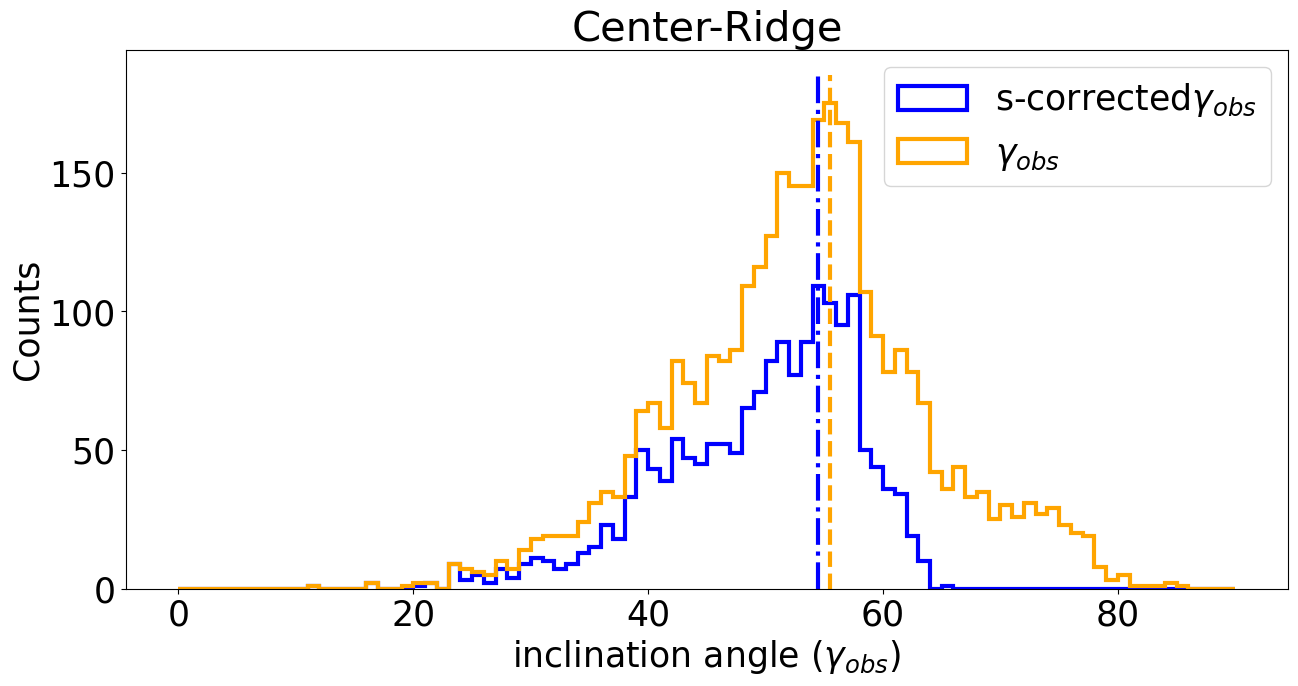

In [6]:
plt.figure(figsize = (15, 7))
y2 = np.linspace(0,185)
xs2 = [54.5]*len(y2)
xp2 = [55.5]*len(y2)

s2 = S_data[mask2]
s_median2 = np.logical_and(S_data<st.median(s2), mask2)
s_good2 = p_data[s_median2]
gammas2 = [(1/2)*np.arccos(((2*p_obs*(1+(2/3)*p_0))/(p_0*(1+p_obs)))-1)*180/np.pi for p_obs in s_good2]
hists2, bins, patches = plt.hist(gammas2, 90, range= (0,90),  histtype = 'step', label = 's-corrected$\gamma_{obs}$', color = 'blue', lw = 3)

i_good2 = mask2.nonzero()
p_good2 = p_data[i_good2]
gamma2 = [(1/2)*np.arccos(((2*p_obs*(1+(2/3)*p_0))/(p_0*(1+p_obs)))-1)*180/np.pi for p_obs in p_good2]
hist2, bins, patches = plt.hist(gamma2, 90, range= (0,90), histtype = 'step', label = '$\gamma_{obs}$', color = 'orange', lw = 3)

plt.plot(xp2, y2, '--', color = 'orange', lw = 3)
plt.plot(xs2, y2, '-.', color = 'blue', lw = 3)

plt.title('Center-Ridge')
plt.xlabel('inclination angle ($\gamma_{obs}$)')
plt.ylabel('Counts')

plt.legend()

plt.savefig('/Users/alisonandrade/Documents/alison_17/590thesis/vela_plots/image_S_p_cen_rig_mode', bbox_inches='tight')

array([55.5])

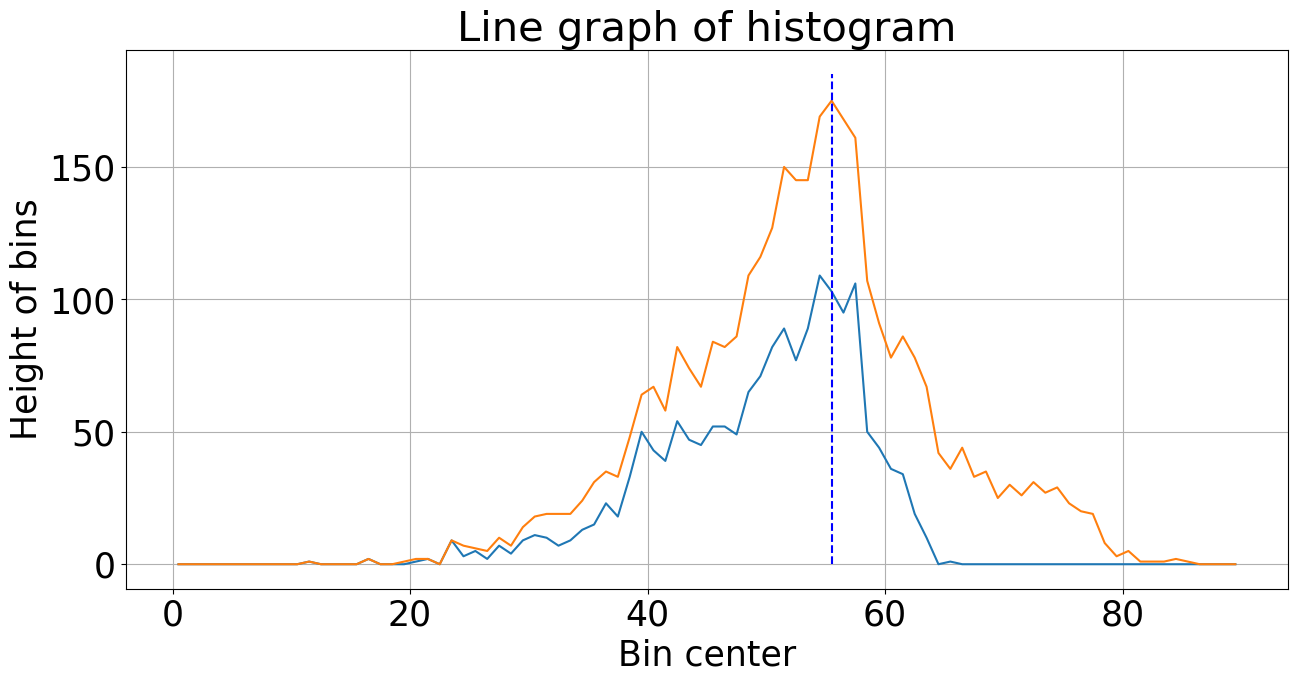

In [7]:
gausss2 = np.zeros(len(bins)-1)                #array of zeroes for bincenter
gauss2 = np.zeros(len(bins)-1)  

for m in range(len(bins)-1):                  #Loops through all the bins and sets a value for each center on the x axis
    gausss2[m] = (0.5*(bins[m]+bins[m+1]))
    gauss2[m] = (0.5*(bins[m]+bins[m+1]))
    
plt.plot(gausss2, hists2)                        #Plotting of histogram as a line graph
plt.plot(gauss2, hist2)                        #Plotting of histogram as a line graph
plt.title('Line graph of histogram')
plt.xlabel('Bin center')
plt.ylabel('Height of bins')
plt.grid()

y2 = np.linspace(0,185)
xs2 = [55.5]*len(y2)
plt.plot(xs2, y2, '--', color = 'blue')

gausss2[np.where(hists2 == hists2.max())]
gauss2[np.where(hist2 == hist2.max())]



# 2 Center-Nest

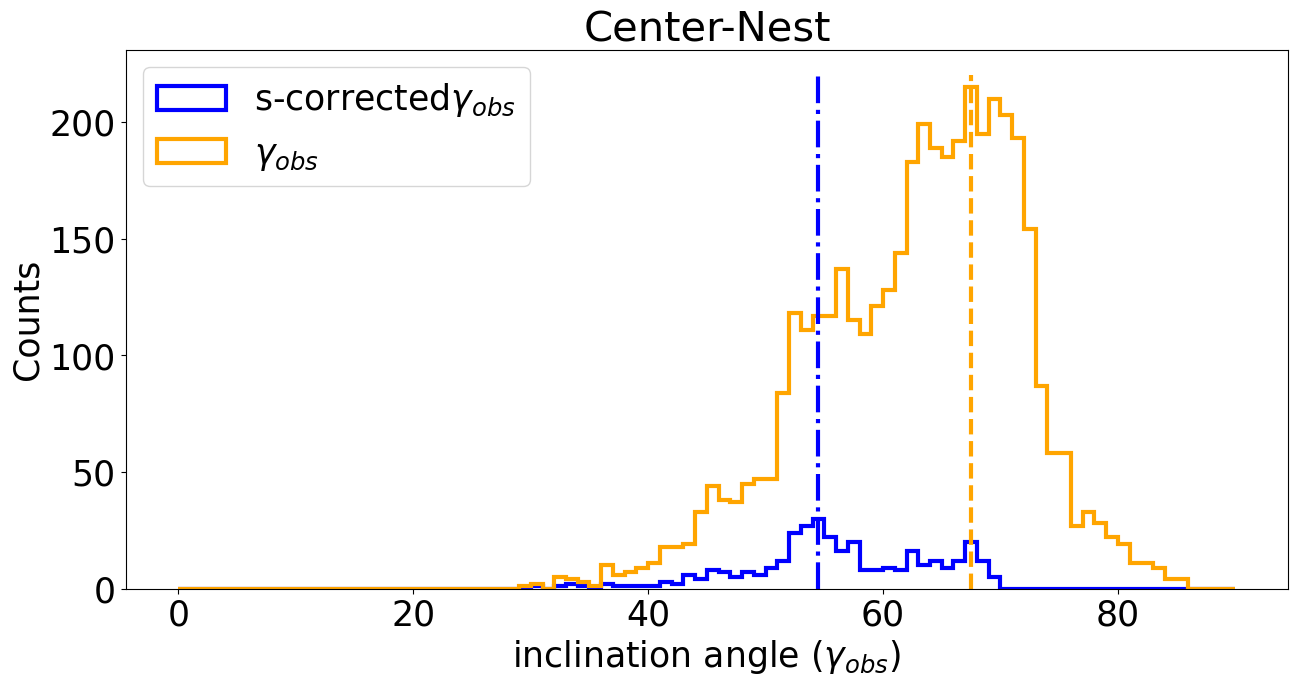

In [9]:
plt.figure(figsize = (15, 7))
y3 = np.linspace(0,220)
xs3 = [54.5]*len(y3)
xp3 = [67.5]*len(y3)

s3 = S_data[mask3]

s_median3 = np.logical_and(S_data<st.median(s3), mask3)
s_good3 = p_data[s_median3]
gammas3 = [(1/2)*np.arccos(((2*p_obs*(1+(2/3)*p_0))/(p_0*(1+p_obs)))-1)*180/np.pi for p_obs in s_good3]
hists3, bins, patches = plt.hist(gammas3, 90, range= (0,90),  histtype = 'step', label = 's-corrected$\gamma_{obs}$', color = 'blue', lw = 3)

i_good3 = mask3.nonzero()
p_good3 = p_data[i_good3]
gamma3 = [(1/2)*np.arccos(((2*p_obs*(1+(2/3)*p_0))/(p_0*(1+p_obs)))-1)*180/np.pi for p_obs in p_good3]
hist3, bins, patches = plt.hist(gamma3, 90, range= (0,90), histtype = 'step', label = '$\gamma_{obs}$', color = 'orange', lw = 3)

plt.plot(xp3, y3, '--', color = 'orange', lw = 3)
plt.plot(xs3, y3, '-.', color = 'blue', lw = 3)

plt.title('Center-Nest')
plt.xlabel('inclination angle ($\gamma_{obs}$)')
plt.ylabel('Counts')

plt.legend()
plt.savefig('/Users/alisonandrade/Documents/alison_17/590thesis/vela_plots/image_S_p_cen_nest_mode', bbox_inches='tight')

[54.5]
[67.5]


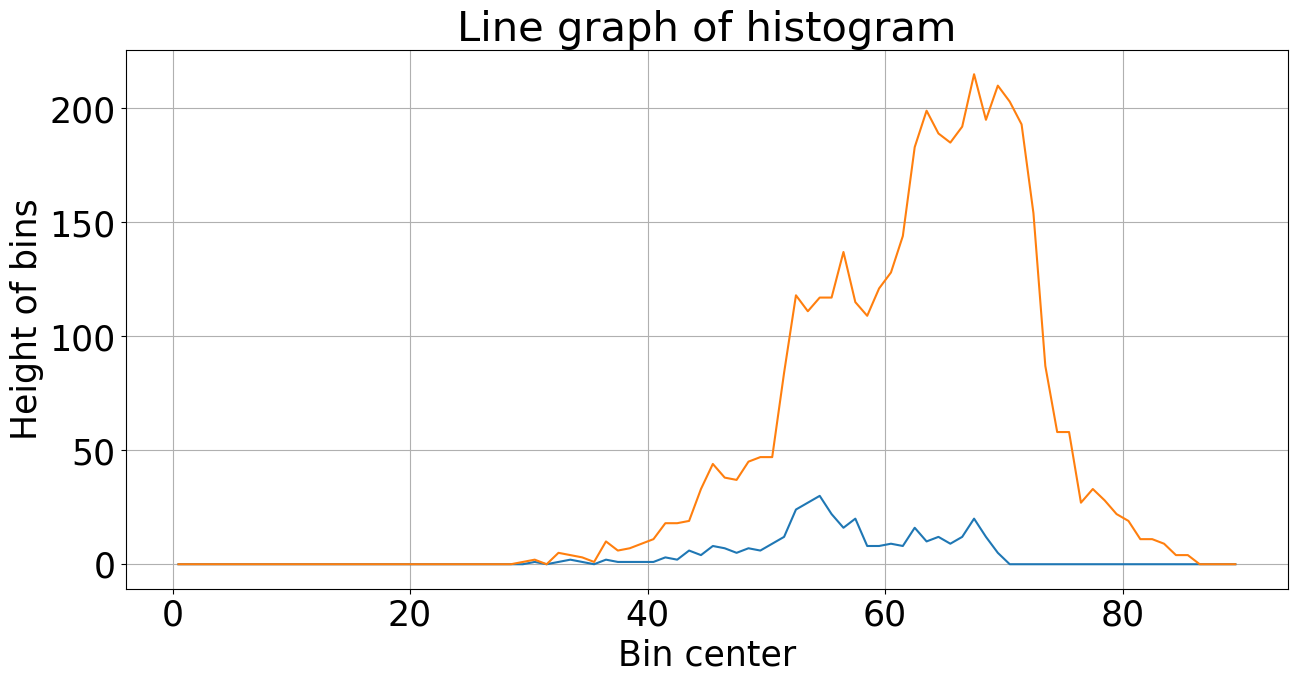

In [10]:
gausss3 = np.zeros(len(bins)-1)                #array of zeroes for bincenter
gauss3 = np.zeros(len(bins)-1)  

for m in range(len(bins)-1):                  #Loops through all the bins and sets a value for each center on the x axis
    gausss3[m] = (0.5*(bins[m]+bins[m+1]))
    gauss3[m] = (0.5*(bins[m]+bins[m+1]))

plt.plot(gausss3, hists3)                        #Plotting of histogram as a line graph
plt.plot(gauss3, hist3)                        #Plotting of histogram as a line graph
plt.title('Line graph of histogram')
plt.xlabel('Bin center')
plt.ylabel('Height of bins')
plt.grid()

print(gausss3[np.where(hists3 == hists3.max())])
print(gauss3[np.where(hist3 == hist3.max())])

# 3 South-Ridge

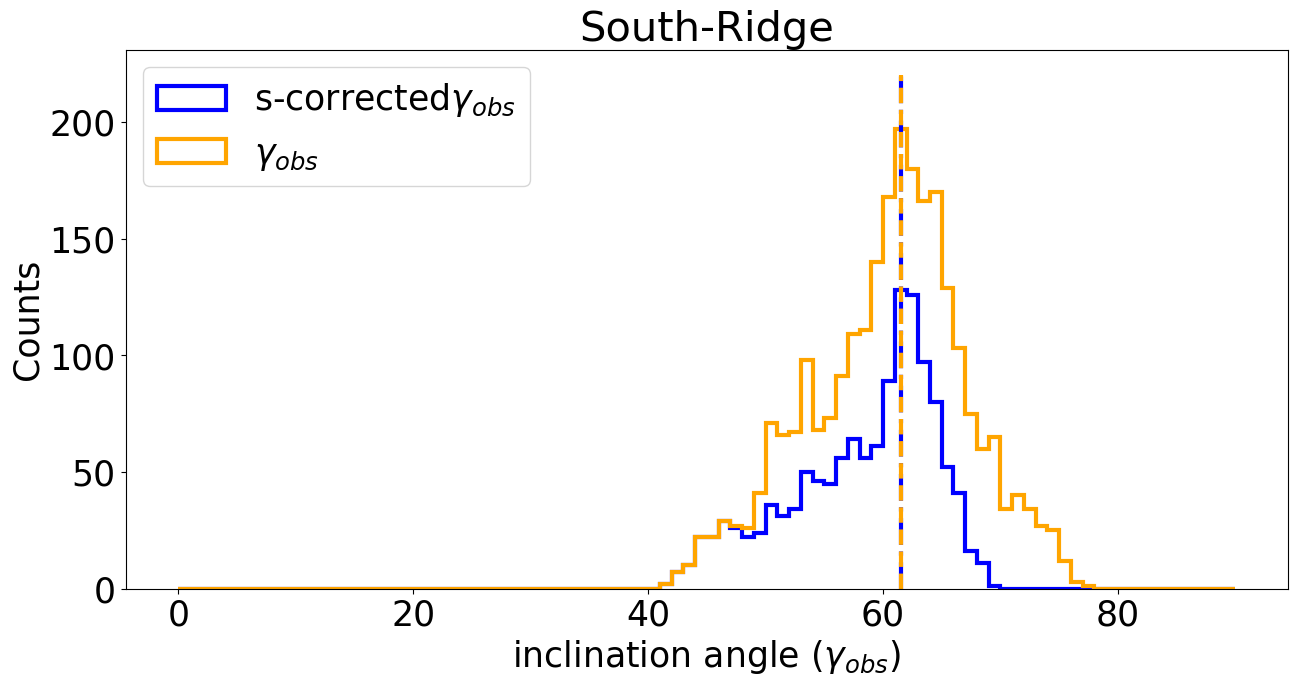

In [11]:
plt.figure(figsize = (15, 7))

y4 = np.linspace(0,220)
xs4 = [61.5]*len(y4)
xp4 = [61.5]*len(y4)

s4 = S_data[mask4]
s_median4 = np.logical_and(mask4, S_data<st.median(s4))
s_good4 = p_data[s_median4]
gammas4 = [(1/2)*np.arccos(((2*p_obs*(1+(2/3)*p_0))/(p_0*(1+p_obs)))-1)*180/np.pi for p_obs in s_good4]
hists4, bins, patches = plt.hist(gammas4, 90, range= (0,90),  histtype = 'step', label = 's-corrected$\gamma_{obs}$', color = 'blue', lw = 3)

i_good4 = mask4.nonzero()
p_good4 = p_data[i_good4]
gamma4 = [(1/2)*np.arccos(((2*p_obs*(1+(2/3)*p_0))/(p_0*(1+p_obs)))-1)*180/np.pi for p_obs in p_good4]
hist4, bins, patches = plt.hist(gamma4, 90, range= (0,90), histtype = 'step', label = '$\gamma_{obs}$', color = 'orange', lw = 3)

plt.plot(xs4, y4, '-.', color = 'blue',lw = 3)
plt.plot(xp4, y4, '--', color = 'orange', lw = 3)

plt.title('South-Ridge')
plt.xlabel('inclination angle ($\gamma_{obs}$)')
plt.ylabel('Counts')

plt.legend()

plt.savefig('/Users/alisonandrade/Documents/alison_17/590thesis/vela_plots/image_S_p_sou_rig_mode', bbox_inches='tight')

[61.5]
[61.5]


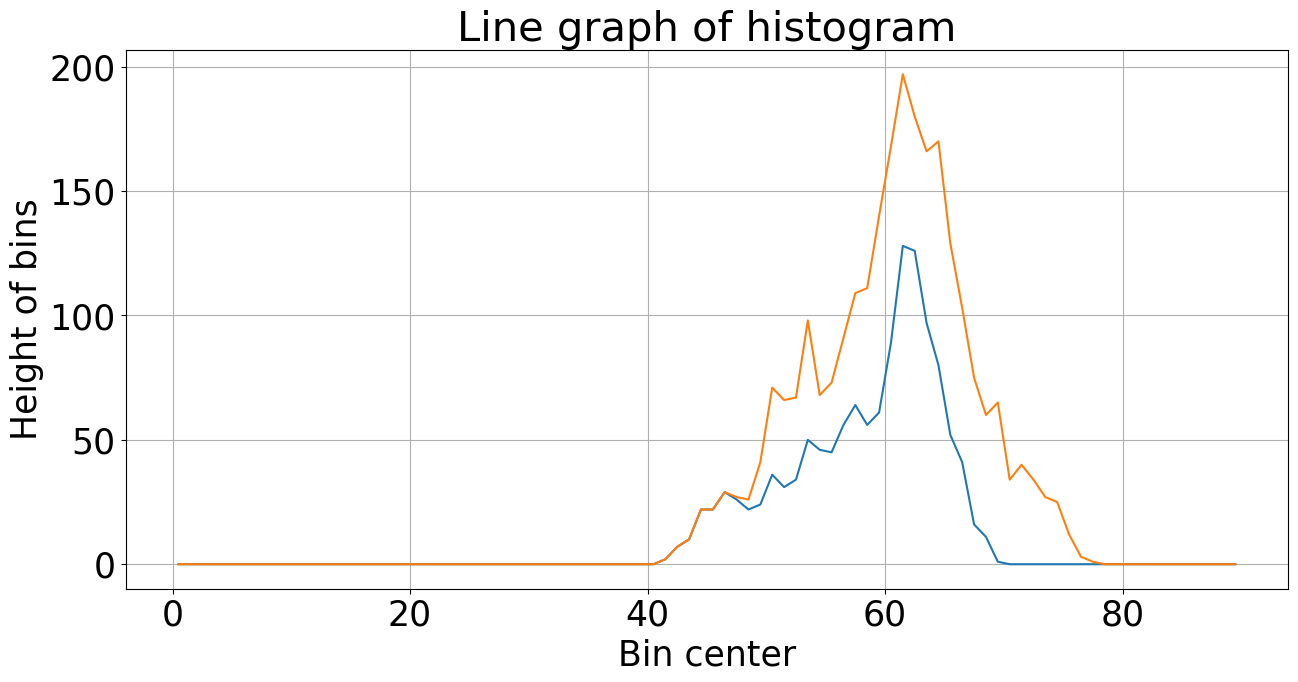

In [12]:
gausss4 = np.zeros(len(bins)-1)                #array of zeroes for bincenter
gauss4 = np.zeros(len(bins)-1)  

for m in range(len(bins)-1):                  #Loops through all the bins and sets a value for each center on the x axis
    gausss4[m] = (0.5*(bins[m]+bins[m+1]))
    gauss4[m] = (0.5*(bins[m]+bins[m+1]))

plt.plot(gausss4, hists4)                        #Plotting of histogram as a line graph
plt.plot(gauss4, hist4)                        #Plotting of histogram as a line graph
plt.title('Line graph of histogram')
plt.xlabel('Bin center')
plt.ylabel('Height of bins')
plt.grid()

print(gausss4[np.where(hists4 == hists4.max())])
print(gauss4[np.where(hist4 == hist4.max())])

# 4 South-Nest

/var/folders/lp/bh247h21459_r2sf0dzyrx_w0000gn/T/ipykernel_74939/2396043265.py:10: RuntimeWarning: invalid value encountered in arccos
  gammas5 = [(1/2)*np.arccos(((2*p_obs*(1+(2/3)*p_0))/(p_0*(1+p_obs)))-1)*180/np.pi for p_obs in s_good5]
/var/folders/lp/bh247h21459_r2sf0dzyrx_w0000gn/T/ipykernel_74939/2396043265.py:15: RuntimeWarning: invalid value encountered in arccos
  gamma5 = [(1/2)*np.arccos(((2*p_obs*(1+(2/3)*p_0))/(p_0*(1+p_obs)))-1)*180/np.pi for p_obs in p_good5]


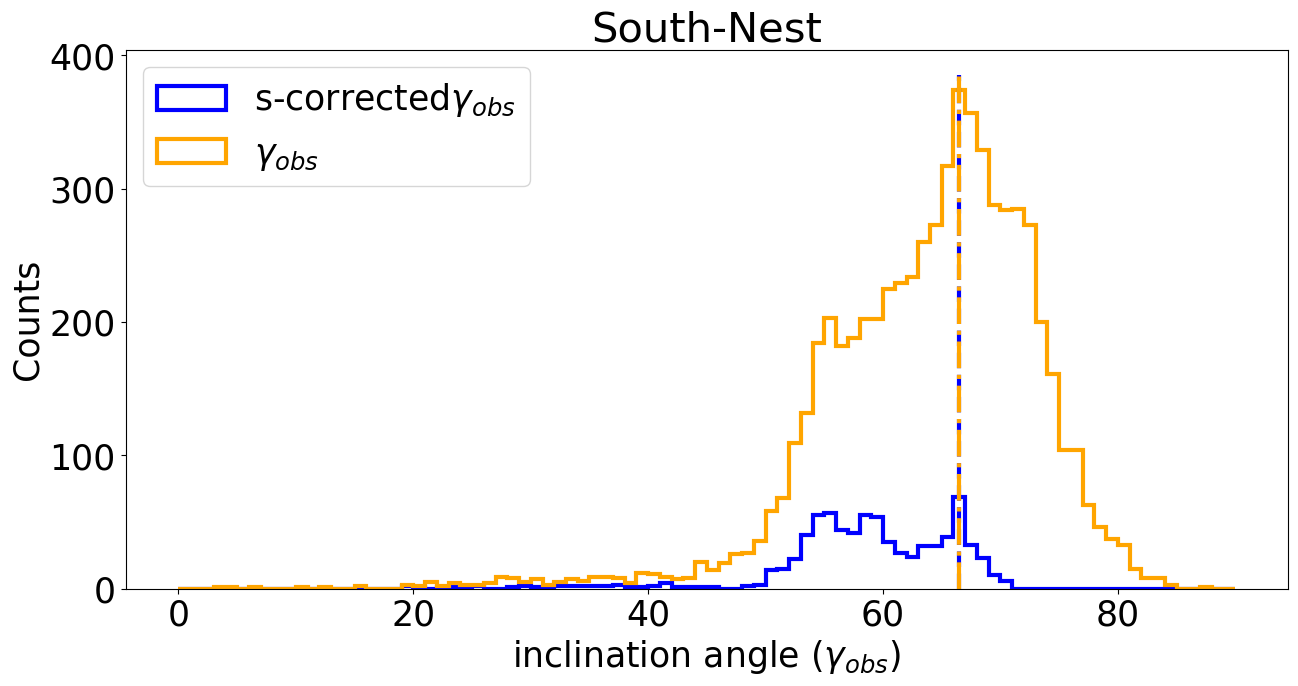

In [13]:
plt.figure(figsize = (15, 7))

y5 = np.linspace(0,385)
xs5 = [66.5]*len(y5)
xp5 = [66.5]*len(y5)

s5 = S_data[mask5]
s_median5 = np.logical_and(S_data<st.median(s5), mask5)
s_good5 = p_data[s_median5]
gammas5 = [(1/2)*np.arccos(((2*p_obs*(1+(2/3)*p_0))/(p_0*(1+p_obs)))-1)*180/np.pi for p_obs in s_good5]
hists5, bins, patches = plt.hist(gammas5, 90, range= (0,90),  histtype = 'step', label = 's-corrected$\gamma_{obs}$', color = 'blue', lw = 3)

i_good5 = mask5.nonzero()
p_good5 = p_data[i_good5]
gamma5 = [(1/2)*np.arccos(((2*p_obs*(1+(2/3)*p_0))/(p_0*(1+p_obs)))-1)*180/np.pi for p_obs in p_good5]
hist5, bins, patches = plt.hist(gamma5, 90, range= (0,90), histtype = 'step', label = '$\gamma_{obs}$', color = 'orange', lw = 3)

plt.plot(xs5, y5, '--', color = 'blue', lw = 3)
plt.plot(xp5, y5, '-.', color = 'orange', lw = 3)

plt.title('South-Nest')
plt.xlabel('inclination angle ($\gamma_{obs}$)')
plt.ylabel('Counts')

plt.legend()

plt.savefig('/Users/alisonandrade/Documents/alison_17/590thesis/vela_plots/image_S_p_sou_nest_mode', bbox_inches='tight')

[66.5]
[66.5]


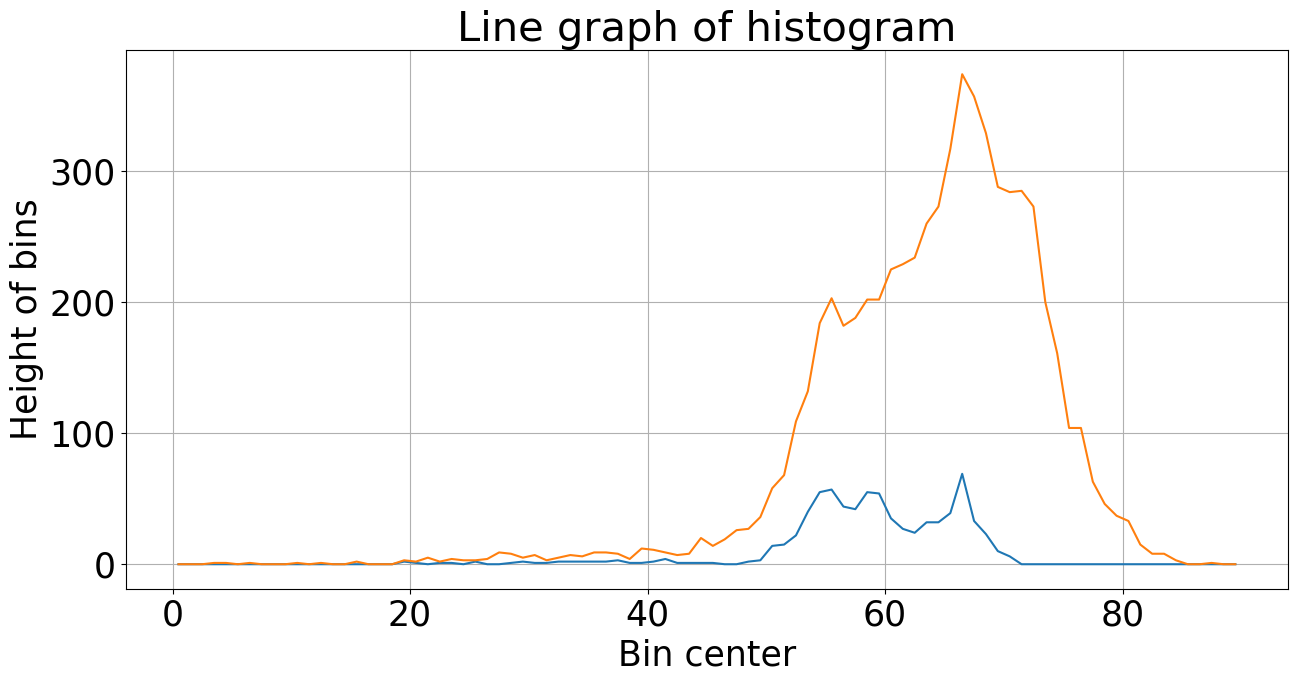

In [14]:
gausss5 = np.zeros(len(bins)-1)                #array of zeroes for bincenter
gauss5 = np.zeros(len(bins)-1)  

for m in range(len(bins)-1):                  #Loops through all the bins and sets a value for each center on the x axis
    gausss5[m] = (0.5*(bins[m]+bins[m+1]))
    gauss5[m] = (0.5*(bins[m]+bins[m+1]))

plt.plot(gausss5, hists5)                        #Plotting of histogram as a line graph
plt.plot(gauss5, hist5)                        #Plotting of histogram as a line graph
plt.title('Line graph of histogram')
plt.xlabel('Bin center')
plt.ylabel('Height of bins')
plt.grid()

print(gausss5[np.where(hists5 == hists5.max())])
print(gauss5[np.where(hist5 == hist5.max())])

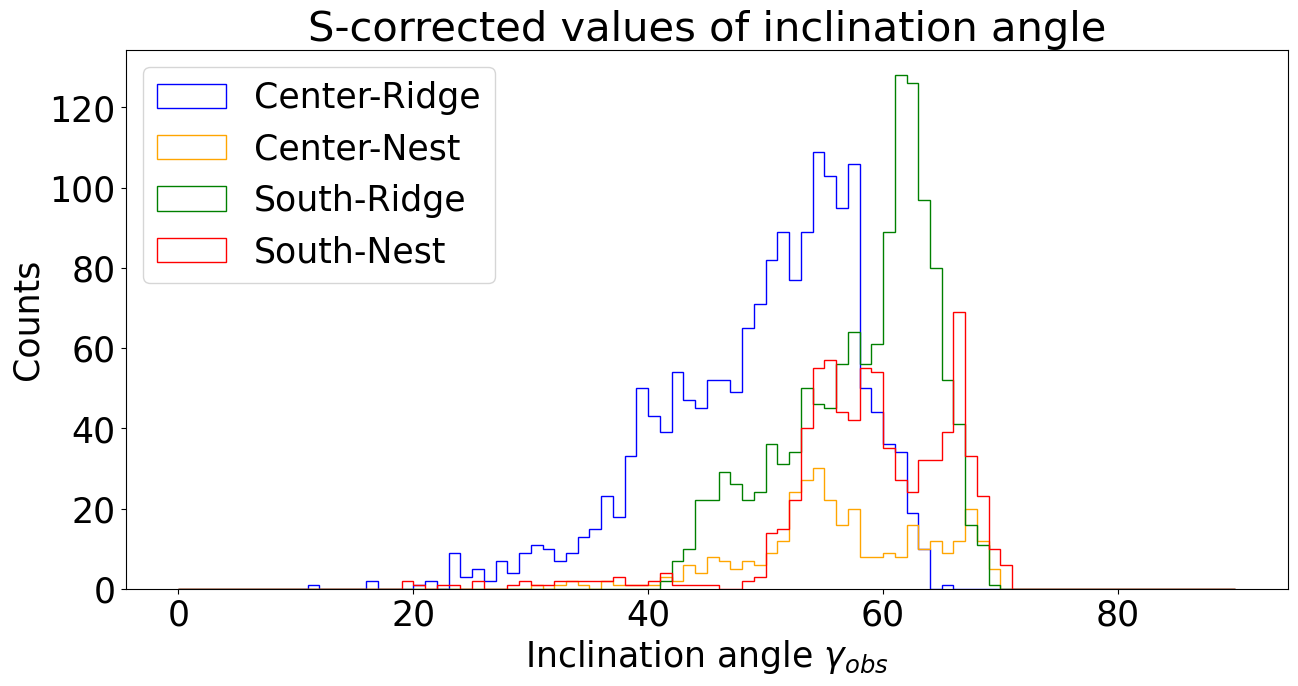

In [15]:
hists2, bins, patches = plt.hist(gammas2, 90, range= (0,90),  histtype = 'step', label = 'Center-Ridge', color = 'blue')
hists3, bins, patches = plt.hist(gammas3, 90, range= (0,90),  histtype = 'step', label = 'Center-Nest', color = 'orange')
hists4, bins, patches = plt.hist(gammas4, 90, range= (0,90),  histtype = 'step', label = 'South-Ridge', color = 'green')
hists5, bins, patches = plt.hist(gammas5, 90, range= (0,90),  histtype = 'step', label = 'South-Nest', color = 'red')
plt.xlabel('Inclination angle $\gamma_{obs}$')
plt.ylabel('Counts')
plt.title('S-corrected values of inclination angle')
plt.legend()
plt.savefig('S_only')

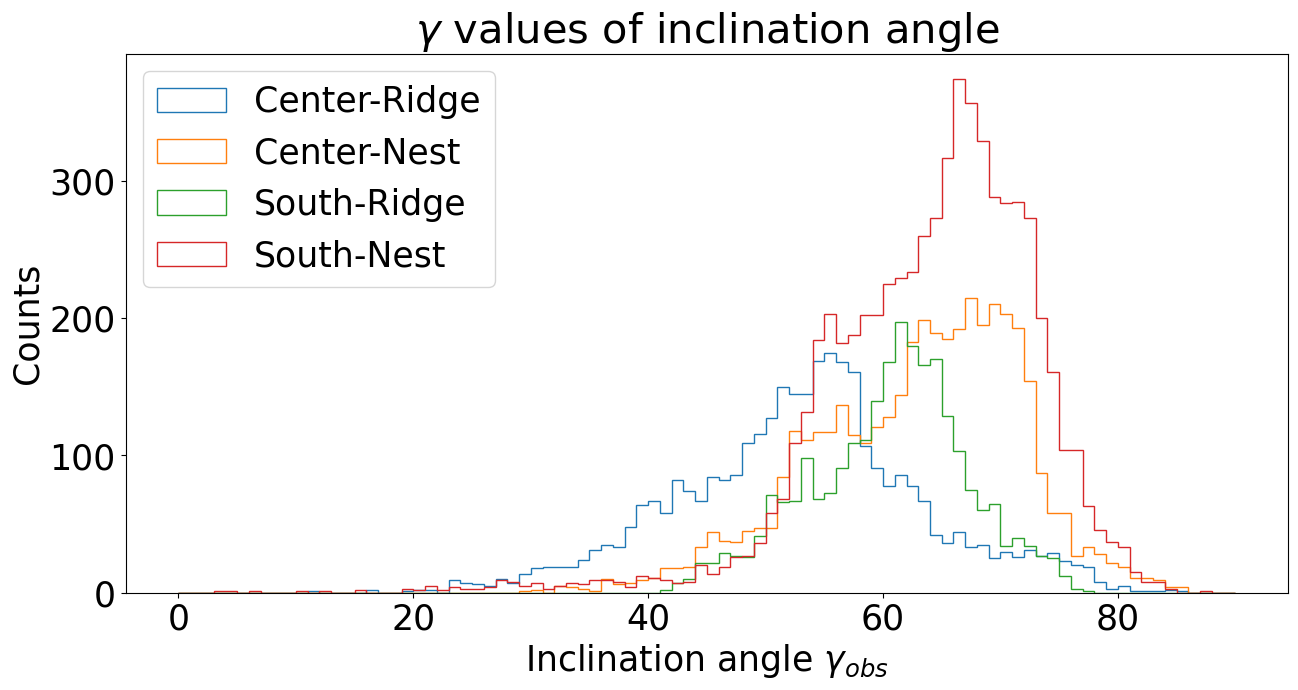

In [16]:
hist2, bins, patches = plt.hist(gamma2, 90, range= (0,90),  histtype = 'step', label = 'Center-Ridge')
hist3, bins, patches = plt.hist(gamma3, 90, range= (0,90),  histtype = 'step', label = 'Center-Nest')
hist4, bins, patches = plt.hist(gamma4, 90, range= (0,90),  histtype = 'step', label = 'South-Ridge')
hist5, bins, patches = plt.hist(gamma5, 90, range= (0,90),  histtype = 'step', label = 'South-Nest')
plt.xlabel('Inclination angle $\gamma_{obs}$')
plt.ylabel('Counts')
plt.title('$\gamma$ values of inclination angle')
plt.legend()
plt.savefig('p_only')

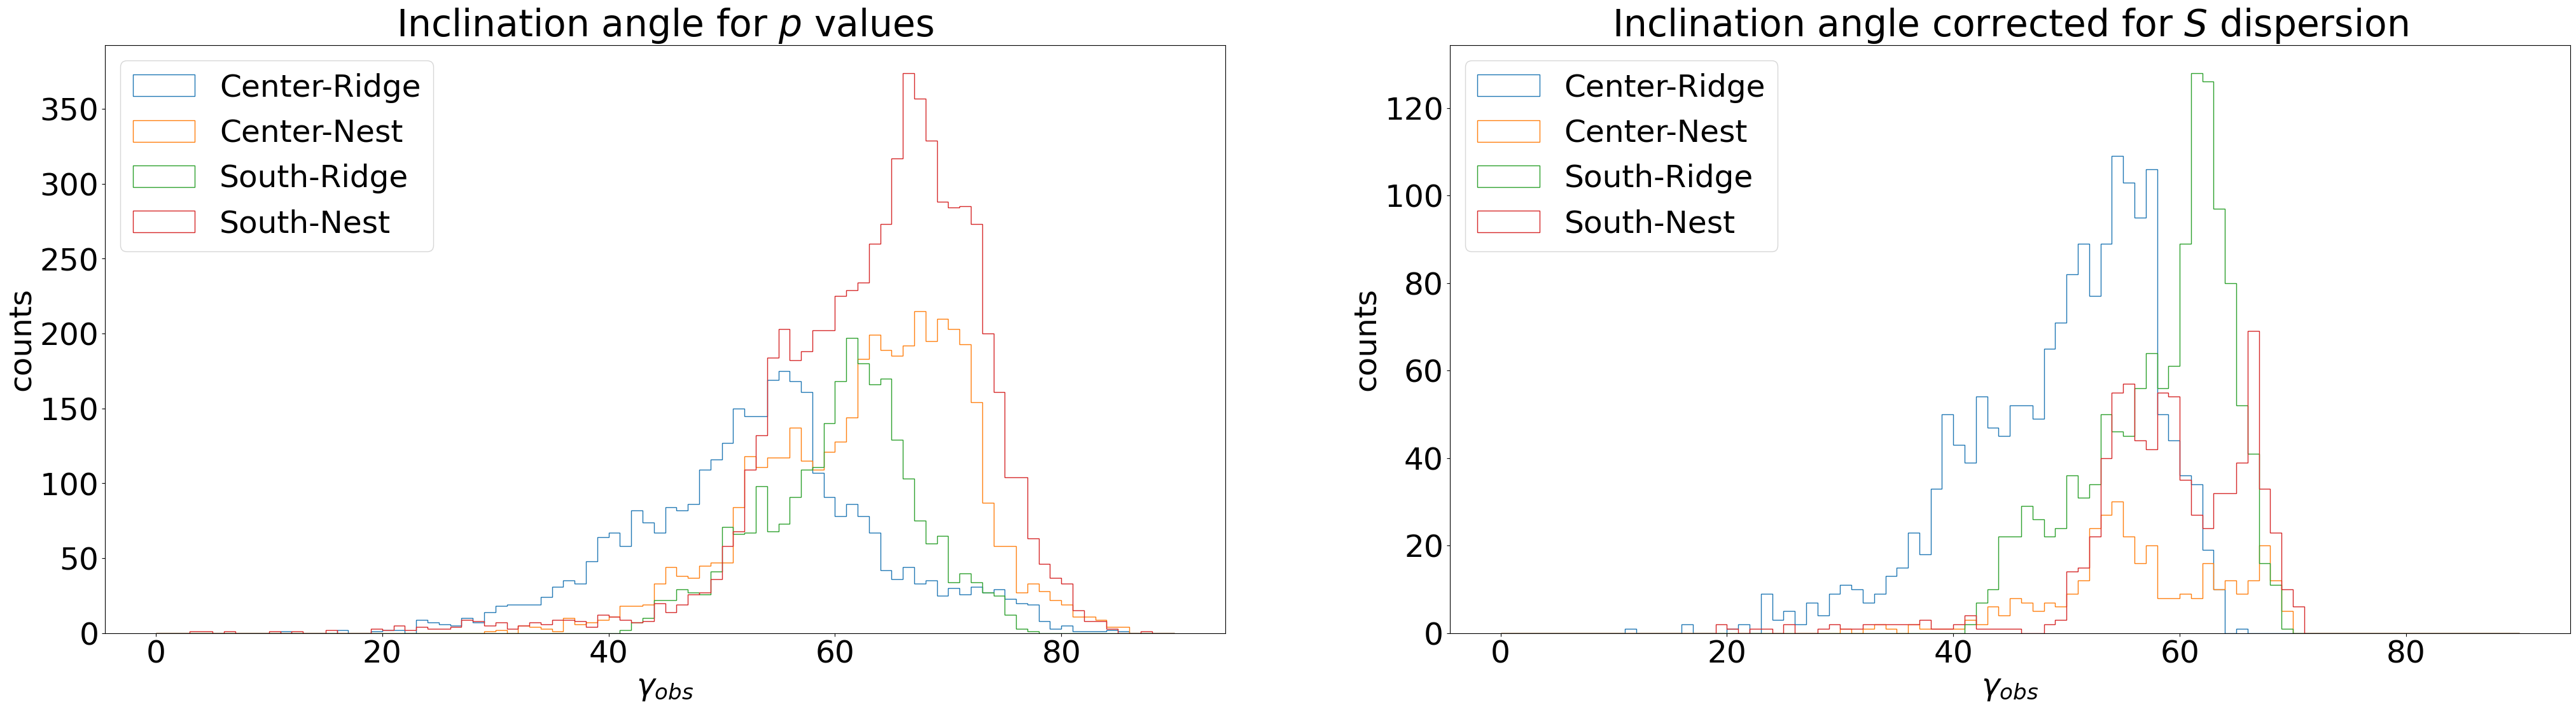

In [17]:
matplotlib.rcParams.update({'font.size': 35})
fig, axs = plt.subplots(1, 2, figsize = (50,12))
axs[0].hist(gamma2, 90, range= (0,90),  histtype = 'step', label = 'Center-Ridge')
axs[0].hist(gamma3, 90, range= (0,90),  histtype = 'step', label = 'Center-Nest')
axs[0].hist(gamma4, 90, range= (0,90),  histtype = 'step', label = 'South-Ridge')
axs[0].hist(gamma5, 90, range= (0,90),  histtype = 'step', label = 'South-Nest')
axs[0].set_title('Inclination angle for $p$ values')

axs[0].legend(loc = 'upper left')

axs[1].hist(gammas2, 90, range= (0,90),  histtype = 'step', label = 'Center-Ridge')
axs[1].hist(gammas3, 90, range= (0,90),  histtype = 'step', label = 'Center-Nest')
axs[1].hist(gammas4, 90, range= (0,90),  histtype = 'step', label = 'South-Ridge')
axs[1].hist(gammas5, 90, range= (0,90),  histtype = 'step', label = 'South-Nest')
axs[1].set_title('Inclination angle corrected for $S$ dispersion')
axs[1].legend(loc = 'upper left')

for ax in axs.flat:
    ax.set(xlabel='$\gamma_{obs}$', ylabel='counts')

plt.savefig('S_p_all')

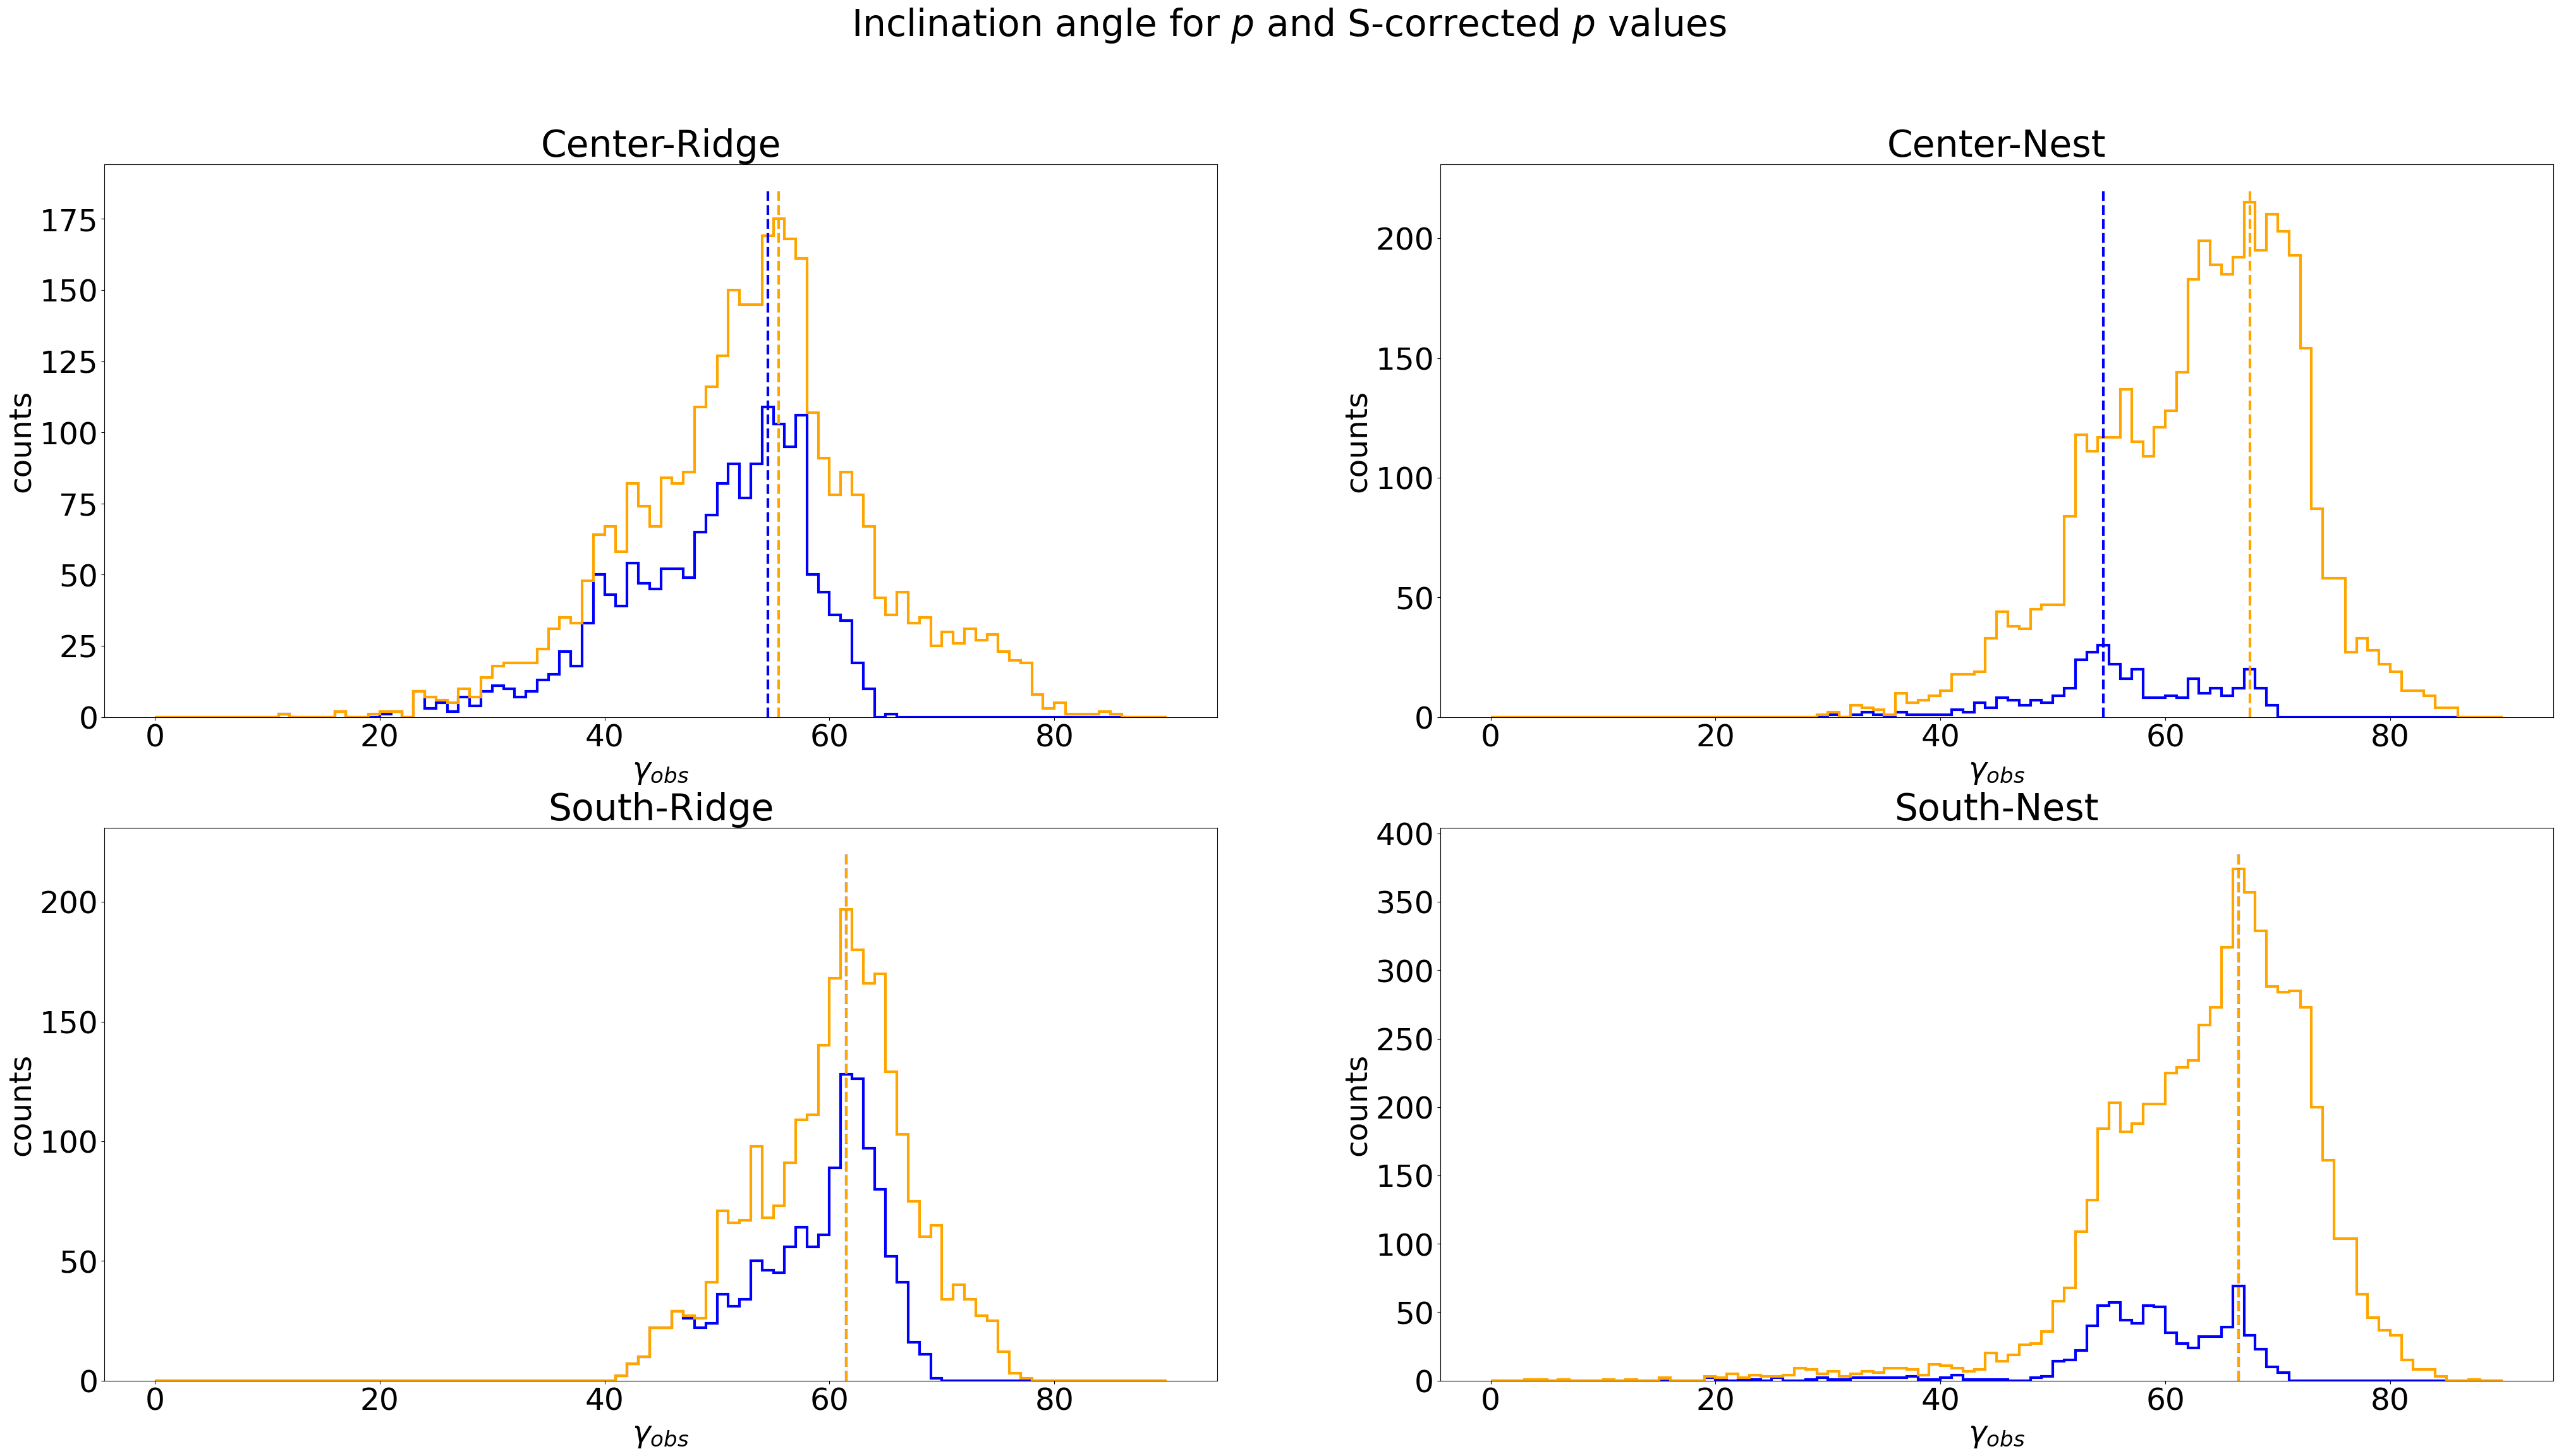

In [33]:
matplotlib.rcParams.update({'font.size': 35})

fig, axs = plt.subplots(2, 2, figsize = (50,25))
axs[0, 0].hist(gammas2, 90, range= (0,90),  histtype = 'step', color = 'blue', lw = 3)
axs[0, 0].hist(gamma2, 90, range= (0,90),  histtype = 'step', color = 'orange', lw = 3)
axs[0, 0].plot(xs2, y2, '--', color = 'blue', lw = 3)
axs[0, 0].plot(xp2, y2, '--', color = 'orange', lw = 3)
#axs[0, 0].plot(x1, y1, '--', color = 'blue')
axs[0, 0].set_title('Center-Ridge')

#axs[0, 1].plot(x2, y2, '--', color = 'orange')
axs[0, 1].hist(gammas3, 90, range= (0,90),  histtype = 'step', color = 'blue', lw = 3)
axs[0, 1].hist(gamma3, 90, range= (0,90),  histtype = 'step', color = 'orange', lw = 3)
axs[0, 1].plot(xs3, y3, '--', color = 'blue', lw = 3)
axs[0, 1].plot(xp3, y3, '--', color = 'orange', lw = 3)
axs[0, 1].set_title('Center-Nest')


#axs[1, 0].plot(x3, y3, '--', color = 'green')
axs[1, 0].hist(gammas4, 90, range= (0,90),  histtype = 'step', color = 'blue', lw = 3)
axs[1, 0].hist(gamma4, 90, range= (0,90),  histtype = 'step', color = 'orange', lw = 3)
axs[1, 0].plot(xs4, y4, '--', color = 'blue', lw = 3)
axs[1, 0].plot(xp4, y4, '--', color = 'orange', lw = 3)
axs[1, 0].set_title('South-Ridge')


#axs[1, 1].plot(x4, y4, '--', color = 'red')
axs[1, 1].hist(gammas5, 90, range= (0,90),  histtype = 'step', color = 'blue', lw = 3)
axs[1, 1].hist(gamma5, 90, range= (0,90),  histtype = 'step', color = 'orange', lw = 3)
axs[1, 1].plot(xs5, y5, '--', color = 'blue', lw = 3)
axs[1, 1].plot(xp5, y5, '--', color = 'orange', lw = 3)
axs[1, 1].set_title('South-Nest')
fig.suptitle('Inclination angle for $p$ and S-corrected $p$ values')

for ax in axs.flat:
    ax.set(xlabel='$\gamma_{obs}$', ylabel='counts')
    
plt.savefig('/Users/alisonandrade/Documents/alison_17/590thesis/vela_plots/image_S_p_all_comp')